In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten

In [6]:
import tensorflow as tf

In [8]:
from tensorflow.keras import Sequential

In [9]:
import pathlib

In [10]:
import numpy as np

In [11]:
import cv2

In [12]:
flower = r'C:\Users\arjun\Downloads\archive (12)\train'

In [20]:
flower_dir = pathlib.Path(flower)
flower_dir

WindowsPath('C:/Users/arjun/Downloads/archive (12)/train')

In [14]:
import glob

In [16]:
glob.glob('*.*')

['Activation Function.ipynb',
 'ANN.ipynb',
 'cnn.ipynb',
 'cnn_model.pickle',
 'Flower Classification .ipynb',
 'Gradient Scratch .ipynb',
 'Pandas AI .ipynb',
 'Scratch Neural Network .ipynb',
 'Tanserflow 2.ipynb',
 'Tenserflow 1.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [17]:
'Pandas AI .ipynb' in glob.glob('*.*')

True

In [21]:
flower_dir.glob('*')

<generator object Path.glob at 0x000002328F2D46D0>

In [60]:
# call all folder
list(flower_dir.glob('*'))

[WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/dandelion'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/rose'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/sunflower'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/tulip')]

In [59]:
#call all image in folder 
list(flower_dir.glob('*/*'))

[WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12)/train/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('C:/Users/arjun/Downloads/archive (12

In [25]:
len(list(flower_dir.glob('*/*')))

2746

In [80]:
#convert same size of image

image_size = (150,150)
X = []
y = []
classes = []

for index,folder_name in enumerate(flower_dir.glob('*')):
    for flower_name in folder_name.glob('*'):
        #print(type(str(flower_name)))
        arr = cv2.imread(str(flower_name))
        #print(arr.shape)
        dr = cv2.resize(arr,image_size)
        X.append(dr)
        
        y.append(index)
        classes.append(str(folder_name).split('\\')[-1])
    
print(len(X))
print(len(y))
print(len(classes))

2746
2746
2746


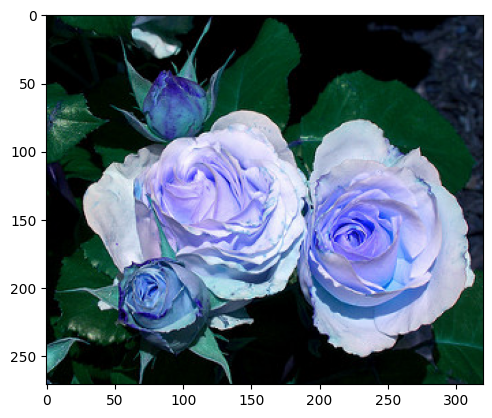

In [62]:
# quality check image use of cv2,plt
plt.imshow(cv2.imread(r'C:\Users\arjun\Downloads\archive (12)\train\rose\4553266758_09d4dbdac9_n.jpg'))

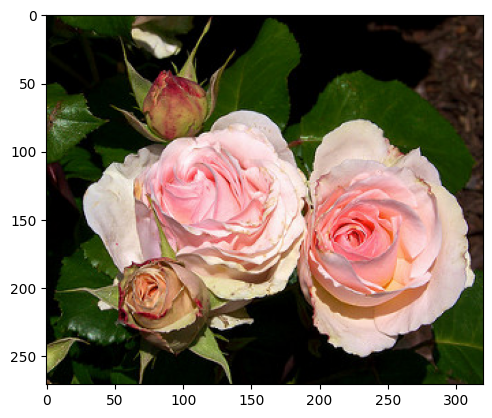

In [39]:
plt.imshow(plt.imread(r'C:\Users\arjun\Downloads\archive (12)\train\rose\4553266758_09d4dbdac9_n.jpg'))

In [53]:
print(len(X))
print(len(y))

2746
2746


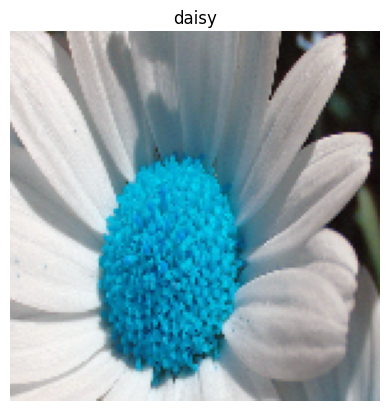

In [82]:
plt.imshow(X[0])
plt.axis('off')
#plt.title(y[0])
plt.title(classes[0])
plt.show()

In [63]:
# for Fast working convert in to array 

In [83]:
X= np.array(X)
y= np.array(y)

In [84]:
# Convert X, Y in to train test split 

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [87]:
X_train.shape

(2196, 150, 150, 3)

In [88]:
X_test.shape

(550, 150, 150, 3)

In [89]:
y_train.shape

(2196,)

In [90]:
y_test.shape

(550,)

In [91]:
# Feature Scalling 
# this is heavy part because array scalling and image 730 image

In [92]:
X_train_sca = X_train/255
X_test_sca = X_test/255

# CNN Model

# with out augmentation

In [93]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [96]:
output_class = len(set(y))

model_cnn = Sequential([
    Conv2D(32,(3,3),padding = 'same',activation = 'relu'),
    # conv 32 is filter 3* 3 array ke 
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
    MaxPool2D((2,2)),
    
    Conv2D(32,(3,3),padding = 'same',activation = 'relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(100,activation = 'relu'),
    Dense(output_class,activation = 'softmax')
    
    
    
])
model_cnn.compile(optimizer = 'adam', 
                  loss= 'sparse_categorical_crossentropy',
                  metrics= ['accuracy'])
model_cnn.fit(X_train_sca,y_train,epochs = 5)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 155s 423ms/step - accuracy: 0.3558 - loss: 1.4424
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 401ms/step - accuracy: 0.5500 - loss: 1.1040
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 437ms/step - accuracy: 0.6151 - loss: 0.9645
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 410ms/step - accuracy: 0.6786 - loss: 0.8051
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step - accuracy: 0.7342 - loss: 0.7047


In [97]:
y_pred_cnn = model_cnn.predict(X_train_sca)

69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step


In [98]:
model_cnn.evaluate(X_test_sca,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6894 - loss: 0.8121


[0.8108089566230774, 0.6781818270683289]

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_test,y_pred_cnn)

ValueError: Found input variables with inconsistent numbers of samples: [550, 2196]